In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [63]:
data = pd.read_csv('./carprice.csv')
df = pd.DataFrame(data)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [65]:
df = pd.get_dummies(data=df, columns=['CarName', 'fueltype', 'aspiration', 'carbody', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype','fuelsystem'])

In [66]:
df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [67]:
X = df.drop(['price'], axis=1)

In [68]:
y = df.price

In [69]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [72]:
train_data = X.join(y)

In [75]:
train_data.info

<bound method DataFrame.info of      car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062

In [77]:
train_data.corr()

/tmp/ipykernel_44627/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,...,-0.108464,-0.269595,-0.085037,-0.094729,0.125568,-0.086367,0.186275,-0.037015,-0.066254,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,...,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,...,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,...,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,...,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158,0.759325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuelsystem_mfi,-0.086367,0.122067,-0.033294,-0.004831,0.012832,-0.101245,0.034431,0.049033,0.070030,0.144263,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902,-0.002747
fuelsystem_mpfi,0.186275,0.012532,0.348891,0.511374,0.461896,0.108685,0.520220,0.483520,0.419335,-0.110280,...,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430,0.517075
fuelsystem_spdi,-0.037015,0.181939,-0.117359,-0.079790,-0.046399,-0.278615,-0.002434,0.004490,-0.004213,0.251259,...,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003,-0.061475
fuelsystem_spfi,-0.066254,0.065707,-0.032129,-0.008245,-0.023158,-0.066778,0.024052,-0.013327,0.025977,-0.005688,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,-0.064430,-0.015003,1.000000,-0.019580


array([[<AxesSubplot: title={'center': 'car_ID'}>,
        <AxesSubplot: title={'center': 'symboling'}>,
        <AxesSubplot: title={'center': 'wheelbase'}>,
        <AxesSubplot: title={'center': 'carlength'}>,
        <AxesSubplot: title={'center': 'carwidth'}>,
        <AxesSubplot: title={'center': 'carheight'}>,
        <AxesSubplot: title={'center': 'curbweight'}>,
        <AxesSubplot: title={'center': 'enginesize'}>,
        <AxesSubplot: title={'center': 'boreratio'}>,
        <AxesSubplot: title={'center': 'stroke'}>,
        <AxesSubplot: title={'center': 'compressionratio'}>,
        <AxesSubplot: title={'center': 'horsepower'}>,
        <AxesSubplot: title={'center': 'peakrpm'}>,
        <AxesSubplot: title={'center': 'citympg'}>],
       [<AxesSubplot: title={'center': 'highwaympg'}>,
        <AxesSubplot: title={'center': 'CarName_Nissan versa'}>,
        <AxesSubplot: title={'center': 'CarName_alfa-romero Quadrifoglio'}>,
        <AxesSubplot: title={'center': 'CarName

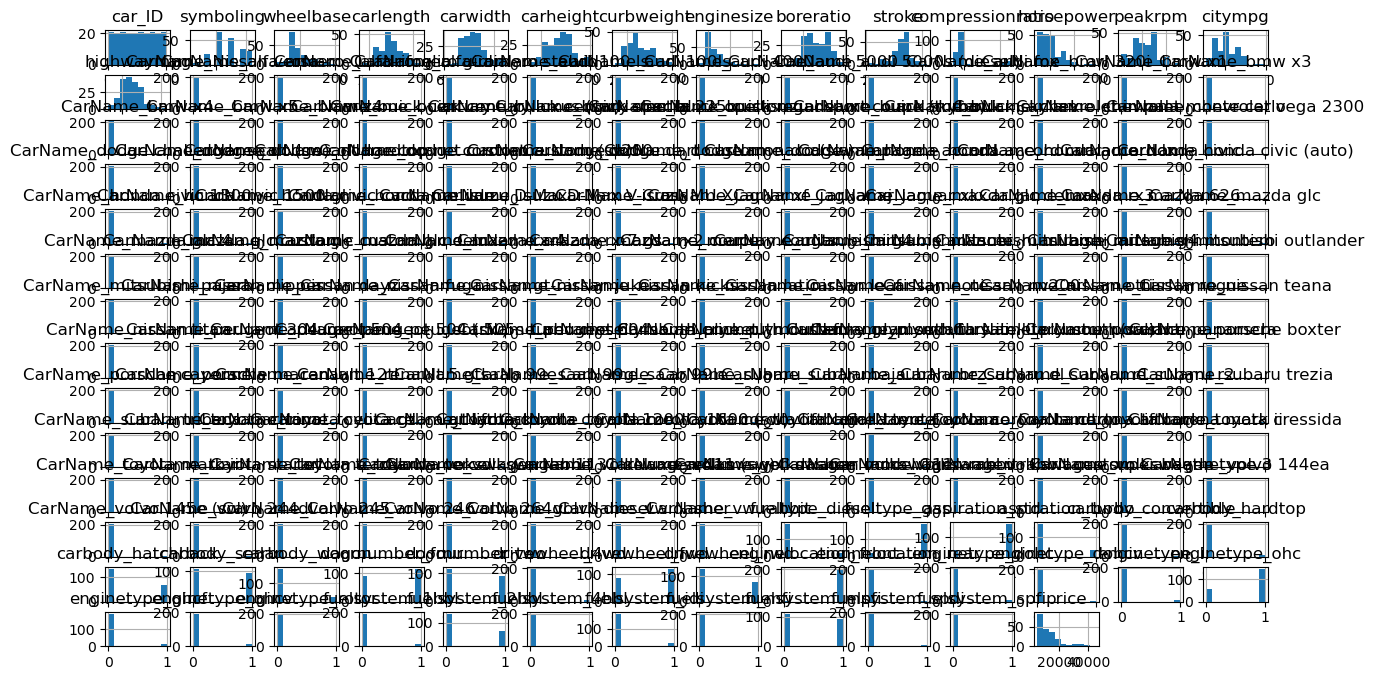

In [84]:
train_data.hist(figsize = (15,8))

In [80]:
train_data.corr()

/tmp/ipykernel_44627/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,...,-0.108464,-0.269595,-0.085037,-0.094729,0.125568,-0.086367,0.186275,-0.037015,-0.066254,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,...,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,...,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,...,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,...,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158,0.759325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuelsystem_mfi,-0.086367,0.122067,-0.033294,-0.004831,0.012832,-0.101245,0.034431,0.049033,0.070030,0.144263,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902,-0.002747
fuelsystem_mpfi,0.186275,0.012532,0.348891,0.511374,0.461896,0.108685,0.520220,0.483520,0.419335,-0.110280,...,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430,0.517075
fuelsystem_spdi,-0.037015,0.181939,-0.117359,-0.079790,-0.046399,-0.278615,-0.002434,0.004490,-0.004213,0.251259,...,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003,-0.061475
fuelsystem_spfi,-0.066254,0.065707,-0.032129,-0.008245,-0.023158,-0.066778,0.024052,-0.013327,0.025977,-0.005688,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,-0.064430,-0.015003,1.000000,-0.019580


/tmp/ipykernel_44627/4030865306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot: >

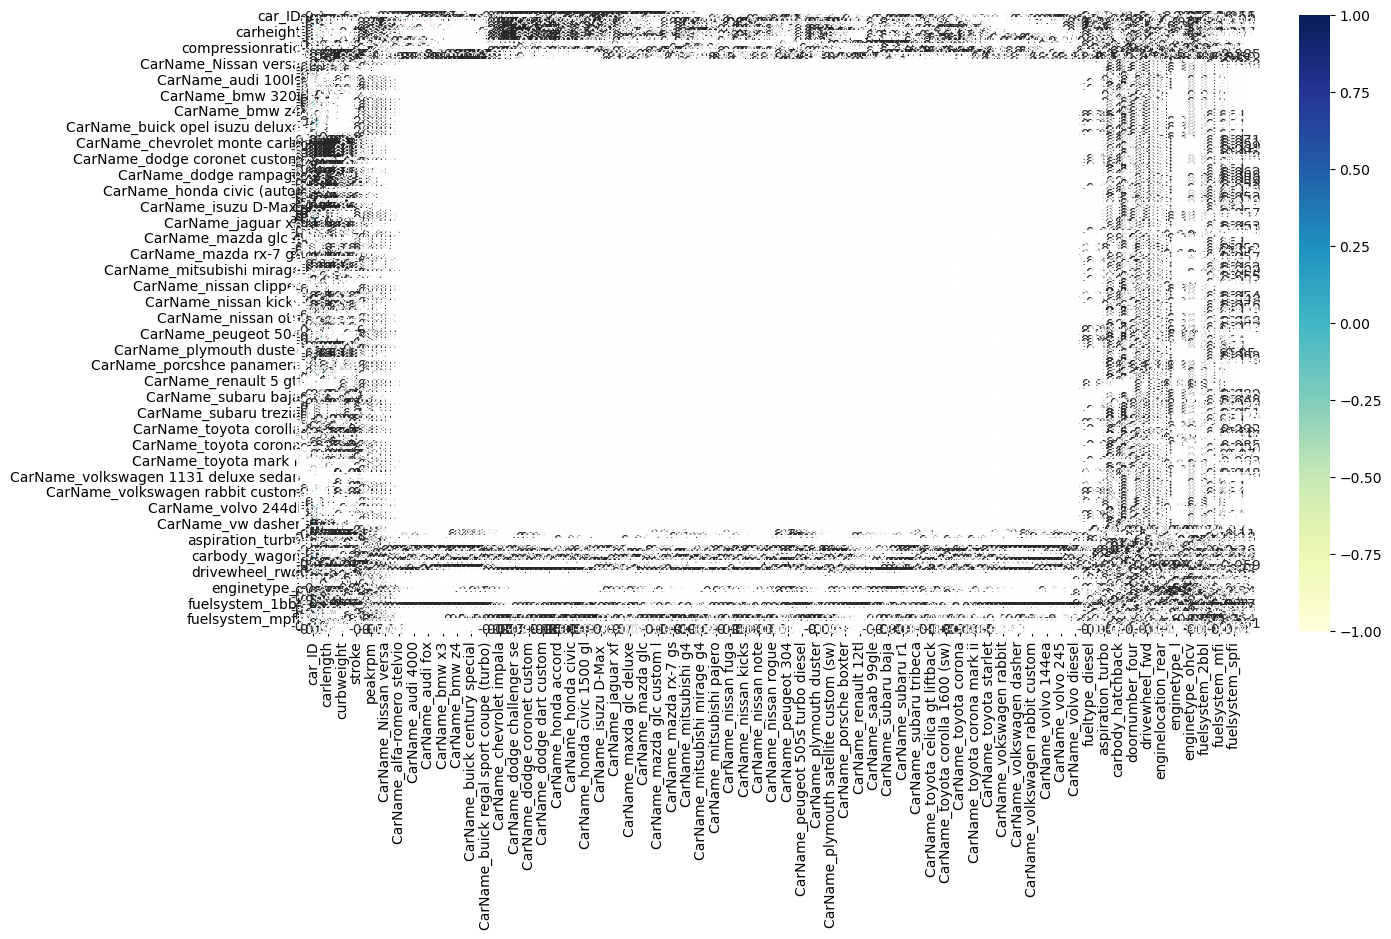

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')